In [97]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Los datasets ya estan trabajados para su mejor analisis.

## Google Bussines

In [98]:
googleDF = pd.read_csv('Datasets optimizados/Google/all_in_one_limpio_con_nombres.csv.gz', compression='gzip')
googleDF.head()

,gmap_id,latitude,longitude,category,avg_rating,Estado_Perteneciente,name
0,0x88f16e41928ff687:0x883dad4fd048e8f8,32.388300,-83.357100,['Pharmacy'],4.9,Georgia,Porter Pharmacy
1,0x80c2c98c0e3c16fd:0x29ec8a728764fdf9,34.018891,-118.215290,['Textile exporter'],4.5,California,City Textile
2,0x80c2c778e3b73d33:0xbdc58662a4a97d49,34.058092,-118.292130,['Korean restaurant'],4.4,California,San Soo Dang
3,0x80c2c89923b27a41:0x32041559418d447,34.023669,-118.232930,['Fabric store'],3.3,California,Nova Fabrics
4,0x80c2c632f933b073:0xc31785961fe826a6,34.036694,-118.249421,['Fabric store'],4.3,California,Nobel Textile Co


In [99]:
googleDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2970366 entries, 0 to 2970365
Data columns (total 7 columns):
 #   Column                Dtype  
---  ------                -----  
 0   gmap_id               object 
 1   latitude              float64
 2   longitude             float64
 3   category              object 
 4   avg_rating            float64
 5   Estado_Perteneciente  object 
 6   name                  object 
dtypes: float64(3), object(4)
memory usage: 158.6+ MB


Vemos los tipos de negocio que tenemos.

In [100]:
import ast
listaCategorias = []
for categorias in googleDF['category']:
    categorias = ast.literal_eval(categorias)
    for categoria in categorias:
        listaCategorias.append(categoria)

listaCategorias = pd.DataFrame({'Categoria' : listaCategorias})
listaCategorias

,Categoria
0,Pharmacy
1,Textile exporter
2,Korean restaurant
3,Fabric store
4,Fabric store
...,...
2970361,Steak houseFine dining restaurantSeafood resta...
2970362,Chevrolet dealer
2970363,Veterinarian
2970364,Animal feed store


C:\Users\Damian\AppData\Local\Temp\ipykernel_21652\2941209049.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data= listaCategorias['Categoria'].value_counts().head(10), palette = 'deep')


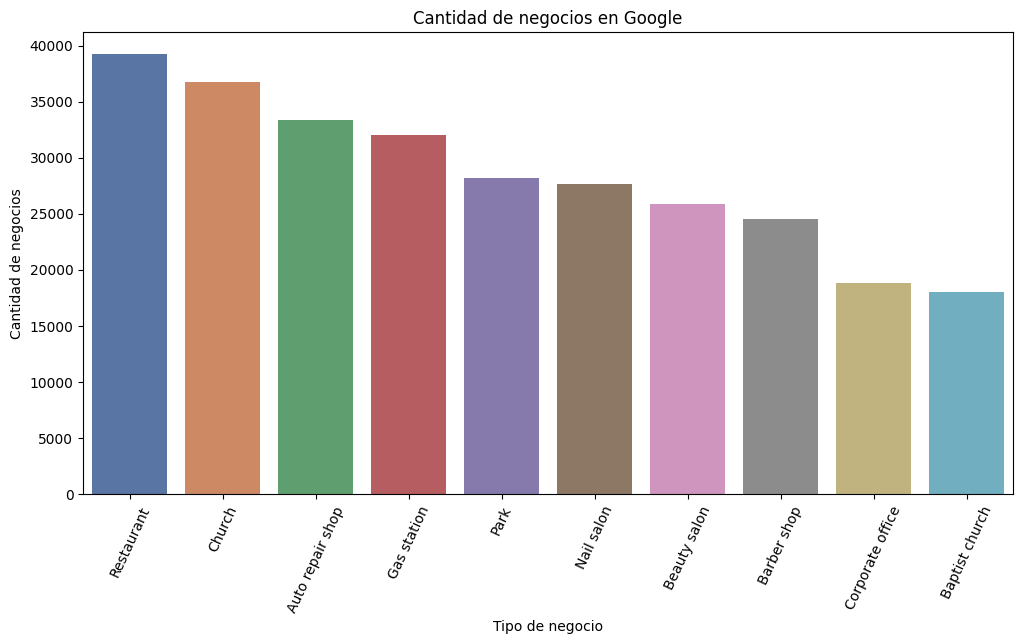

In [101]:
plt.figure(figsize=(12,6))
sns.barplot(data= listaCategorias['Categoria'].value_counts().head(10), palette = 'deep')
plt.xticks(rotation= 65)
plt.ylabel('Cantidad de negocios')
plt.title('Cantidad de negocios en Google')
plt.xlabel('Tipo de negocio')
plt.show()

Como podemos ver el tipo de negocio con mayor cantidad es Restaurant.

Por ende decidimos centrar el analisis y el enfoque del proyecto en este tipo de negocio.

In [102]:
googleDF = googleDF[googleDF['category'].str.contains('Restaurant')]

C:\Users\Damian\AppData\Local\Temp\ipykernel_21652\2343857313.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data= googleDF['Estado_Perteneciente'].value_counts()[0:10], palette='viridis')


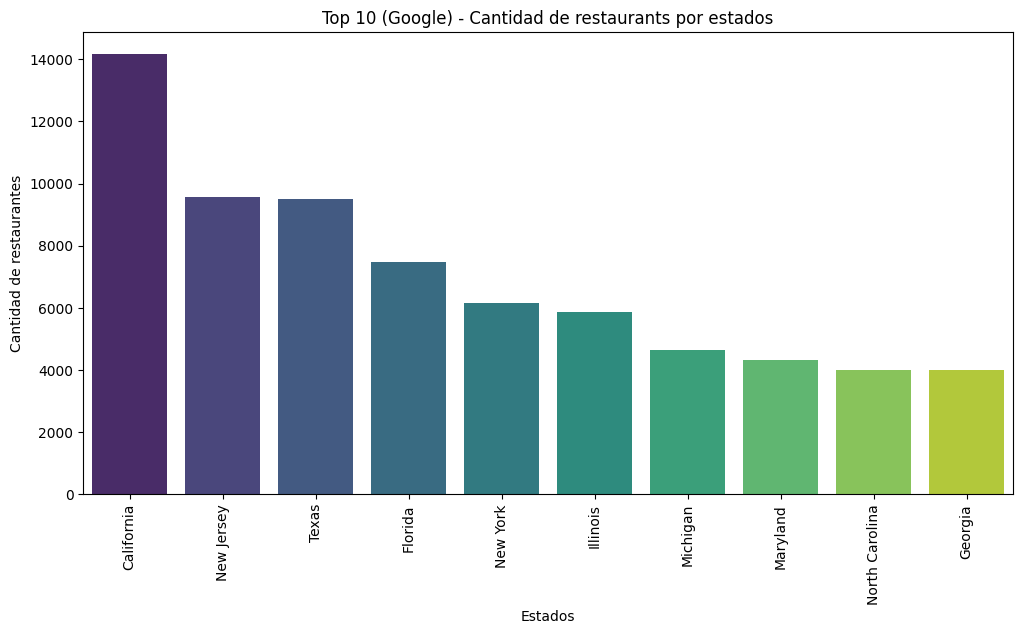

In [122]:
plt.figure(figsize=(12,6))
sns.barplot(data= googleDF['Estado_Perteneciente'].value_counts()[0:10], palette='viridis')
plt.xticks(rotation= 90)
plt.ylabel('Cantidad de restaurantes')
plt.title('Top 10 (Google) - Cantidad de restaurants por estados')
plt.xlabel('Estados')
plt.show()

## Yelp Business

In [104]:
yelpDf = pd.read_csv('Datasets optimizados/Yelp/business.csv.gz', compression='gzip')

In [105]:
yelpDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144671 entries, 0 to 144670
Data columns (total 7 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   business_id           144671 non-null  object 
 1   name                  144671 non-null  object 
 2   latitude              144671 non-null  float64
 3   longitude             144671 non-null  float64
 4   stars                 144671 non-null  float64
 5   categories            144671 non-null  object 
 6   Estado_Perteneciente  144671 non-null  object 
dtypes: float64(3), object(4)
memory usage: 7.7+ MB


Vemos los tipos de negocio que tenemos.

In [106]:
listaCategorias = []
for categorias in yelpDf['categories']:
    if categorias != None:
        for categoria in categorias.split(','):
            listaCategorias.append(categoria.strip())
listaCategorias = pd.DataFrame({'Categoria' : listaCategorias})
listaCategorias

,Categoria
0,Doctors
1,Traditional Chinese Medicine
2,Naturopathic/Holistic
3,Acupuncture
4,Health & Medical
...,...
646014,Bikes
646015,Beauty & Spas
646016,Permanent Makeup
646017,Piercing


C:\Users\Damian\AppData\Local\Temp\ipykernel_21652\2927839917.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data= listaCategorias['Categoria'].value_counts().head(10), palette = 'deep')


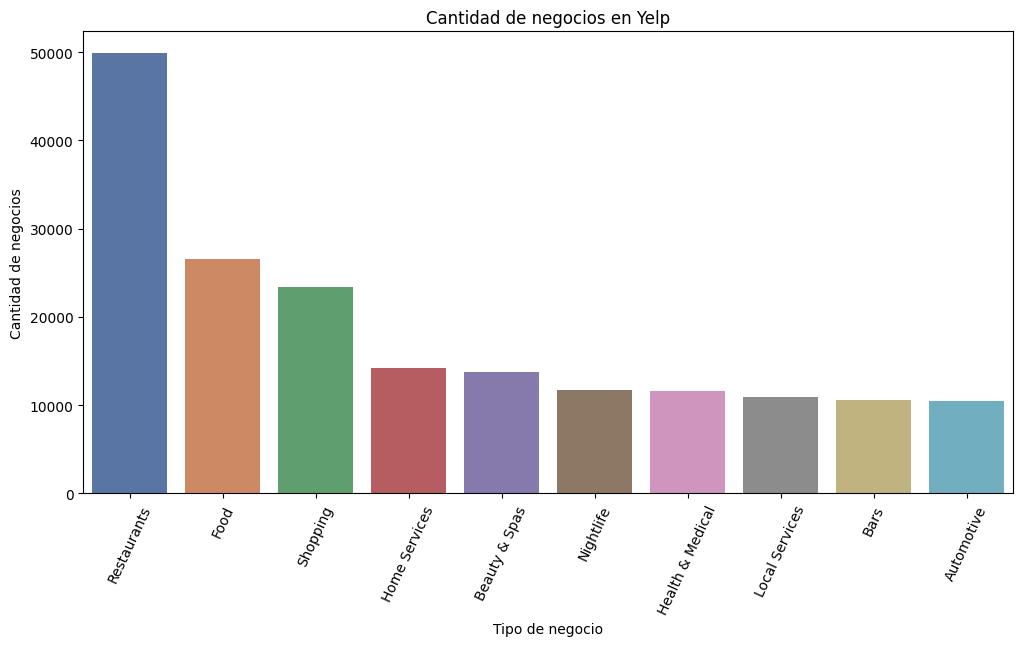

In [107]:
plt.figure(figsize=(12,6))
sns.barplot(data= listaCategorias['Categoria'].value_counts().head(10), palette = 'deep')
plt.xticks(rotation= 65)
plt.ylabel('Cantidad de negocios')
plt.title('Cantidad de negocios en Yelp')
plt.xlabel('Tipo de negocio')
plt.show()

Como podemos ver el tipo de negocio con mayor cantidad es Restaurant.

Por ende decidimos centrar el analisis y el enfoque del proyecto en este tipo de negocio.

In [108]:
yelpDf = yelpDf[yelpDf['categories'].str.contains('Restaurant')]

C:\Users\Damian\AppData\Local\Temp\ipykernel_21652\4246383841.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data= yelpDf['Estado_Perteneciente'].value_counts(), palette='viridis')


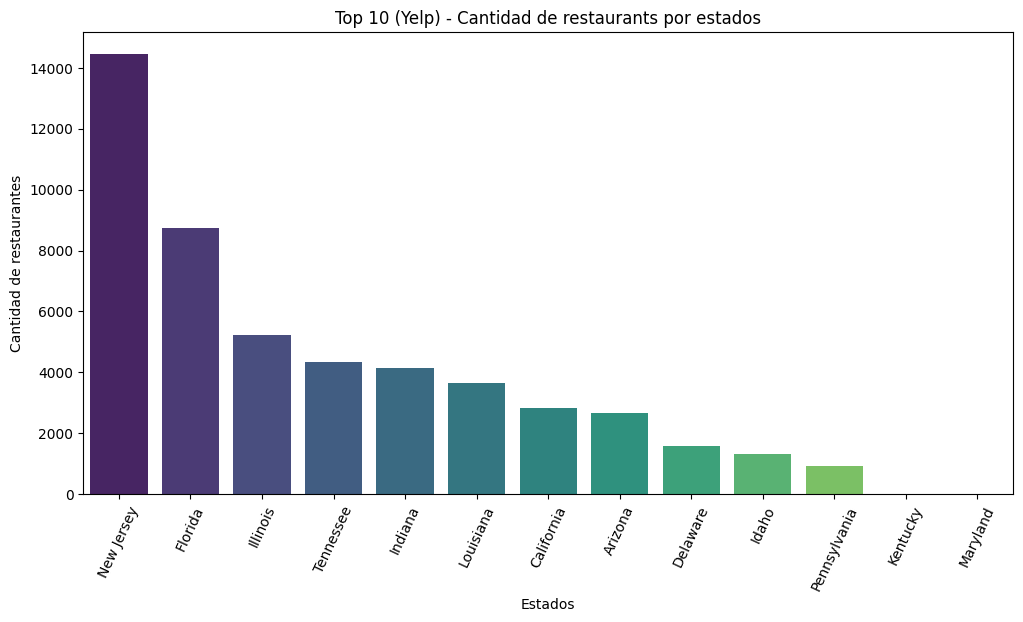

In [121]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.barplot(data= yelpDf['Estado_Perteneciente'].value_counts(), palette='viridis')
plt.xticks(rotation= 65)
plt.ylabel('Cantidad de restaurantes')
plt.xlabel('Estados')
plt.title('Top 10 (Yelp) - Cantidad de restaurants por estados')
plt.show()

## Union de restaurant

In [87]:
googleDF.head()

,gmap_id,latitude,longitude,category,avg_rating,Estado_Perteneciente,name
6,0x80dd2b4c8555edb7:0xfc33d65c4bdbef42,33.916402,-118.010855,['Restaurant'],4.5,California,Vons Chicken
67,0x89c6c89efcaed69d:0xded973f6033e7dba,39.940293,-75.150923,['Restaurant'],4.0,New Jersey,Vivi Bubble Tea
93,0x7c00456eecad3111:0x8217f9600c51f33,21.637796,-157.920714,['Restaurant'],4.4,Hawaii,Hale Pops
111,0x88db4147b1d9e6f3:0x943dbd10a92ba1b1,26.641377,-81.940545,['Restaurant'],5.0,Florida,Cape Seafood Shack
119,0x8644b59b8fe872e5:0x5e638876caa84cc3,30.273985,-97.719564,['Restaurant'],4.5,Texas,Golden Castle


In [88]:
yelpDf.head()

,business_id,name,latitude,longitude,stars,categories,Estado_Perteneciente
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,39.955505,-75.155564,4.0,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...",New Jersey
5,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,36.269593,-87.058943,2.0,"Burgers, Fast Food, Sandwiches, Food, Ice Crea...",Tennessee
8,k0hlBqXX-Bt0vf1op7Jr1w,Tsevi's Pub And Grill,38.565165,-90.321087,3.0,"Pubs, Restaurants, Italian, Bars, American (Tr...",Illinois
9,bBDDEgkFA1Otx9Lfe7BZUQ,Sonic Drive-In,36.208102,-86.768170,1.5,"Ice Cream & Frozen Yogurt, Fast Food, Burgers,...",Tennessee
11,eEOYSgkmpB90uNA7lDOMRA,Vietnamese Food Truck,27.955269,-82.456320,4.0,"Vietnamese, Food, Restaurants, Food Trucks",Florida


In [89]:
googleDF.columns = ['business_id', 'latitude', 'longitude','categories', 'stars', 'state', 'name']
yelpDf.columns = ['business_id', 'name', 'latitude', 'longitude', 'stars', 'categories', 'state']

googleDF = googleDF[['business_id', 'name' , 'latitude', 'longitude', 'stars','categories', 'state']]
yelpDf = yelpDf[['business_id', 'name' , 'latitude', 'longitude', 'stars', 'categories', 'state']]

Agregamos un identificador

In [90]:
yelpDf['origin'] = 'Y'
googleDF['origin'] = 'G'

Normalizamos las categorias

In [91]:
yelpDf['categories'] = yelpDf['categories'].apply(lambda x: x.replace(', ', ',').split(','))
googleDF['categories'] = googleDF['categories'].apply(lambda x: ast.literal_eval(x.replace('\n', '').replace("' ","',")))

Unimos los datasets

In [92]:
df_unido = pd.concat([yelpDf, googleDF], axis= 0)
df_unido.reset_index(drop=True, inplace=True)
df_unido

,business_id,name,latitude,longitude,stars,categories,state,origin
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,39.955505,-75.155564,4.0,"[Restaurants, Food, Bubble Tea, Coffee & Tea, ...",New Jersey,Y
1,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,36.269593,-87.058943,2.0,"[Burgers, Fast Food, Sandwiches, Food, Ice Cre...",Tennessee,Y
2,k0hlBqXX-Bt0vf1op7Jr1w,Tsevi's Pub And Grill,38.565165,-90.321087,3.0,"[Pubs, Restaurants, Italian, Bars, American (T...",Illinois,Y
3,bBDDEgkFA1Otx9Lfe7BZUQ,Sonic Drive-In,36.208102,-86.768170,1.5,"[Ice Cream & Frozen Yogurt, Fast Food, Burgers...",Tennessee,Y
4,eEOYSgkmpB90uNA7lDOMRA,Vietnamese Food Truck,27.955269,-82.456320,4.0,"[Vietnamese, Food, Restaurants, Food Trucks]",Florida,Y
...,...,...,...,...,...,...,...,...
165840,0x87d246f0f9aa080f:0x5023e31e61a87f1c,Subway,35.491484,-92.034937,4.2,"[Sandwich shop, Caterer, Fast food restaurant,...",Arkansas,G
165841,0x87d28d5aa640a9c5:0x3c9cc5d3a99de80c,"Simple Simon's Pizza - Vilonia, AR",35.081871,-92.207739,4.5,"[Pizza Takeout, Italian restaurant, Pizza rest...",Arkansas,G
165842,0x88d9dd6e78851851:0x849dcf273582261c,Subpreme Grill,25.506121,-80.438215,4.3,"[Sandwich shop, Fast food restaurant, Takeout ...",Florida,G
165843,0x89c6c4072624d2a9:0x4437b2d55e9a5811,Dunkin',39.923594,-75.245269,4.0,"[Coffee shop, Bagel shop, Bakery, Breakfast re...",New Jersey,G


In [93]:
df_unido.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165845 entries, 0 to 165844
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   business_id  165845 non-null  object 
 1   name         165845 non-null  object 
 2   latitude     165845 non-null  float64
 3   longitude    165845 non-null  float64
 4   stars        165845 non-null  float64
 5   categories   165845 non-null  object 
 6   state        165845 non-null  object 
 7   origin       165845 non-null  object 
dtypes: float64(3), object(5)
memory usage: 10.1+ MB


Vemos que no hay nulos.

### Cantidad de restaurantes por estados

In [94]:
cantidad_de_restaurants = df_unido['state'].value_counts()[0:4]

C:\Users\Damian\AppData\Local\Temp\ipykernel_21652\495465015.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cantidad_de_restaurants, palette='deep')


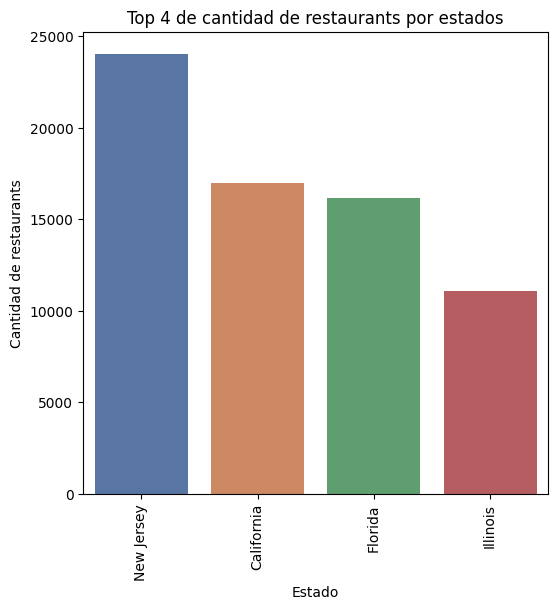

In [96]:
plt.figure(figsize=(6,6))
sns.barplot(data=cantidad_de_restaurants, palette='deep')
plt.xticks(rotation = 90)
plt.ylabel('Cantidad de restaurants')
plt.xlabel('Estado')
plt.title('Top 4 de cantidad de restaurants por estados')
plt.show()